In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy.interpolate import LinearNDInterpolator
from tqdm import tqdm


In [ ]:
# This already has the regridded version in
ds = xr.open_dataset("combined_output_filtered_Eulerian_Lagrangian_Ro_0_1.nc",decode_times=False)


In [3]:
ds

<xarray.Dataset>
Dimensions:               (time: 121, y_afa: 1, x_faa: 306, x_caa: 306,
                           y_aca: 1, z_aac: 86, z_aaf: 87)
Coordinates:
  * time                  (time) float64 0.0 3.6e+03 ... 4.284e+05 4.32e+05
  * y_afa                 (y_afa) float32 0.0
  * x_faa                 (x_faa) float32 -5.1e+03 -5.067e+03 ... 5.067e+03
  * x_caa                 (x_caa) float32 -5.083e+03 -5.05e+03 ... 5.083e+03
  * y_aca                 (y_aca) float32 0.0
  * z_aac                 (z_aac) float32 -103.1 -101.9 -100.6 ... 1.875 3.125
  * z_aaf                 (z_aaf) float32 -103.8 -102.5 -101.2 ... 1.25 2.5 3.75
Data variables: (12/30)
    dx_caa                float32 ...
    dx_faa                float32 ...
    dy_aca                float32 ...
    dy_afa                float32 ...
    dz_aac                float32 ...
    dz_aaf                float32 ...
    ...                    ...
    T_filtered_regrid     (time, z_aac, y_aca, x_caa) float64 ...
    b_filtered_regrid     (time, z_aac, y_aca, x_caa) float64 ...
    wc_filtered_regrid    (time, z_aac, y_aca, x_caa) float64 ...
    b_Eulerian_filtered   (time, z_aac, y_aca, x_caa) float64 ...
    T_Eulerian_filtered   (time, z_aac, y_aca, x_caa) float64 ...
    wc_Eulerian_filtered  (time, z_aac, y_aca, x_caa) float64 ...
Attributes:
    Julia:    This file was generated using Julia Version 1.10.9

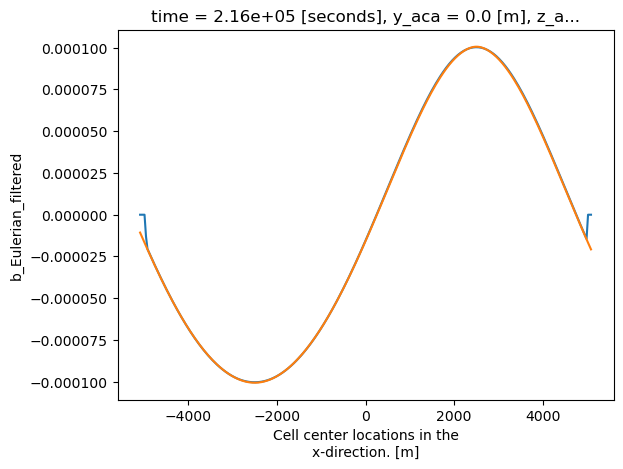

In [ ]:
ds.T_filtered_regrid[60,10,0,:].plot()
#ds.b_Eulerian_filtered[60,10,0,:].plot()

In [63]:
def get_weight_function(t,tstar,N,freq_c):
    
    N_coeffs = 2**(N-1)
    G = np.zeros_like(t)
    for i in range(1,N_coeffs+1):
        
        a = (freq_c/2**N)*np.sin(np.pi/(2**(N+1))*(2*i-1))
        b = (freq_c/2**N)*np.cos(np.pi/(2**(N+1))*(2*i-1))
        c = freq_c*np.sin(np.pi/(2**(N+1))*(2*i-1))
        d = freq_c*np.cos(np.pi/(2**(N+1))*(2*i-1))

        G += (a*np.cos(d*np.abs(t-tstar)) + b*np.sin(d*np.abs(t-tstar)))*np.exp(-c*np.abs(t-tstar))


    return G


In [64]:
for varname in ["b","T",'wc']:
    ds[varname+"_Eulerian_filtered"] = ds.b_filtered.copy(data = 0*ds.b_filtered.data)
    for it in tqdm(range(0,ds.b_filtered.shape[0])):
        ds[varname+"_Eulerian_filtered"][it,:,:,:] = (ds[varname]*get_weight_function(ds.time,ds.time[it],N=2,freq_c=(1e-4)/2)).sum(axis=0)*(ds.time[1] - ds.time[0])

  0%|          | 0/121 [00:00<?, ?it/s]

100%|██████████| 121/121 [00:03<00:00, 35.75it/s]


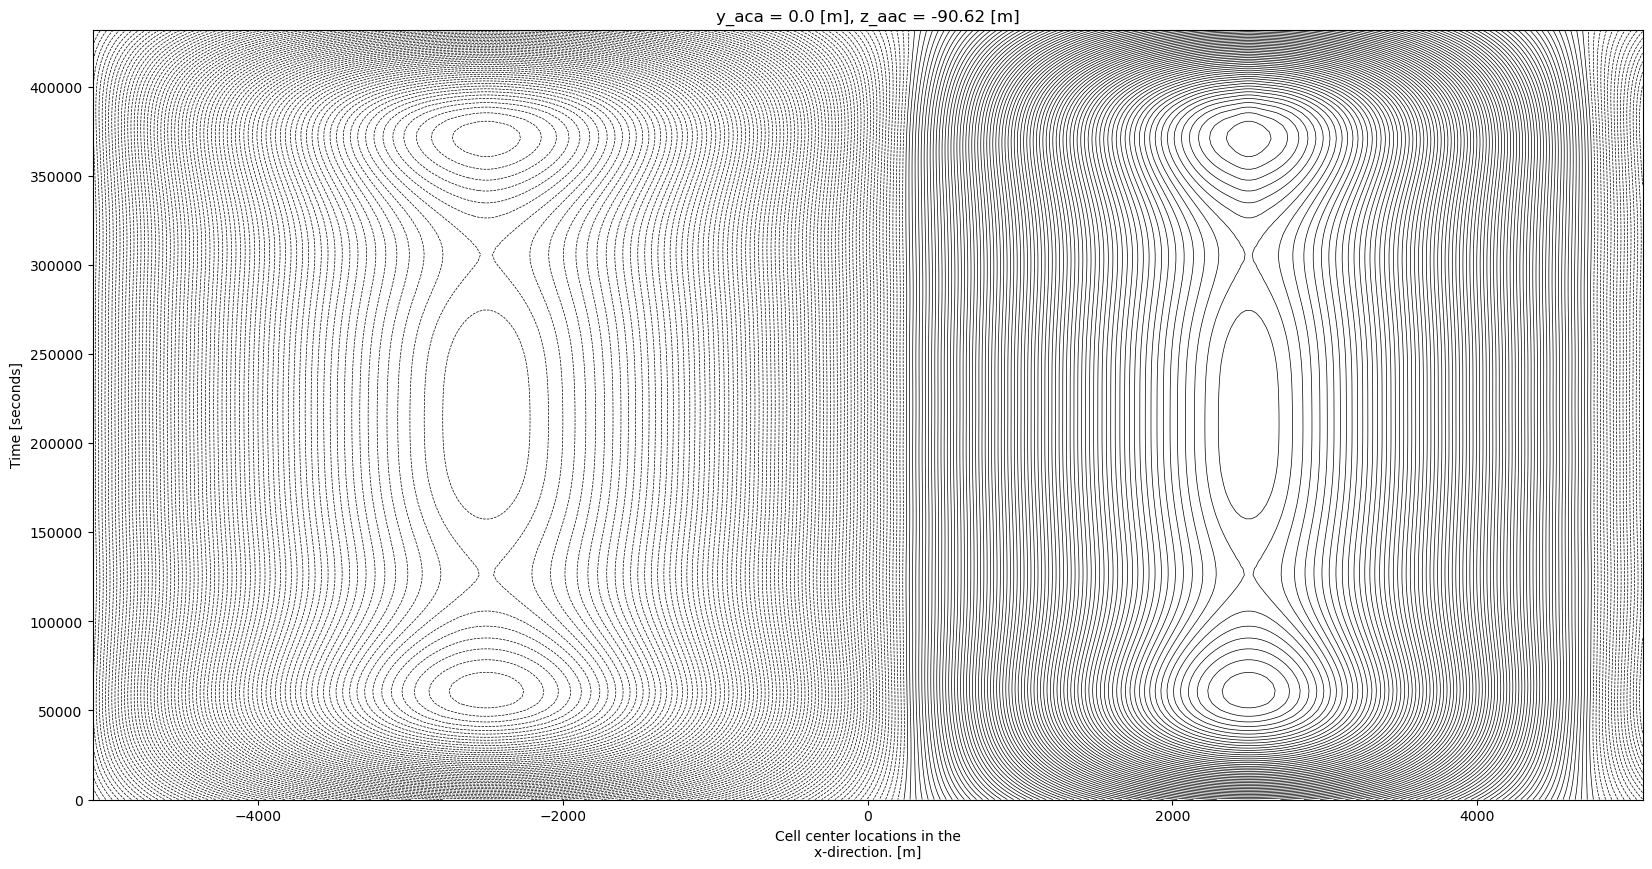

In [39]:
ds.b_Eulerian_filtered[:,10,0,:].plot.contour(figsize = (20,10),levels=200, colors='k',linewidths=0.5)

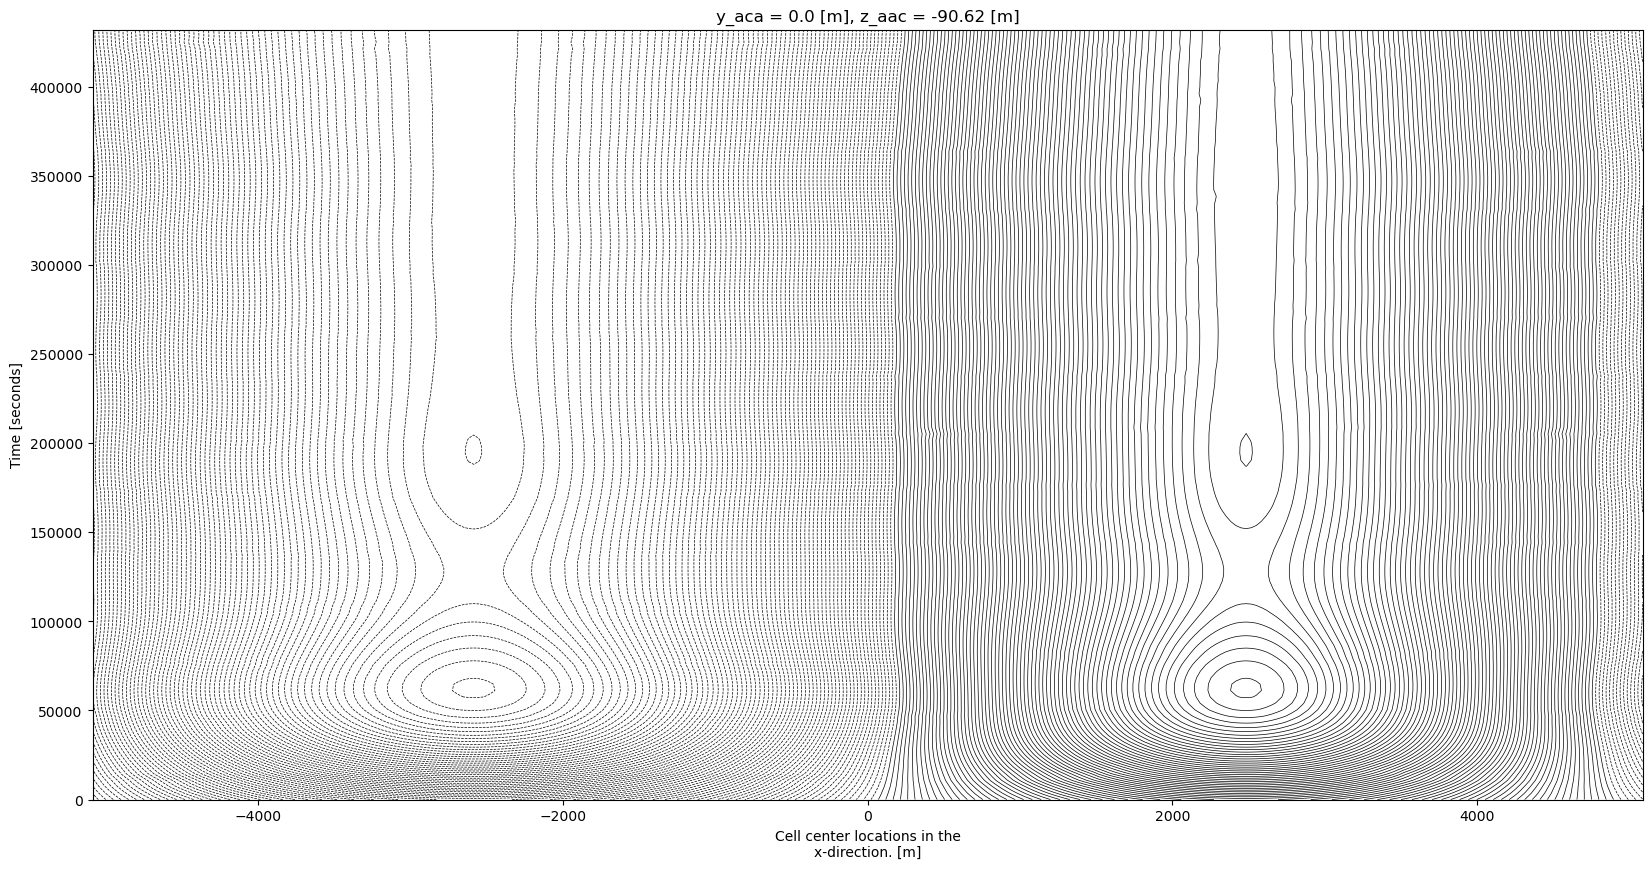

In [41]:
ds.b_filtered_regrid[:,10,0,:].plot.contour(figsize = (20,10),levels=200, colors='k',linewidths=0.5)

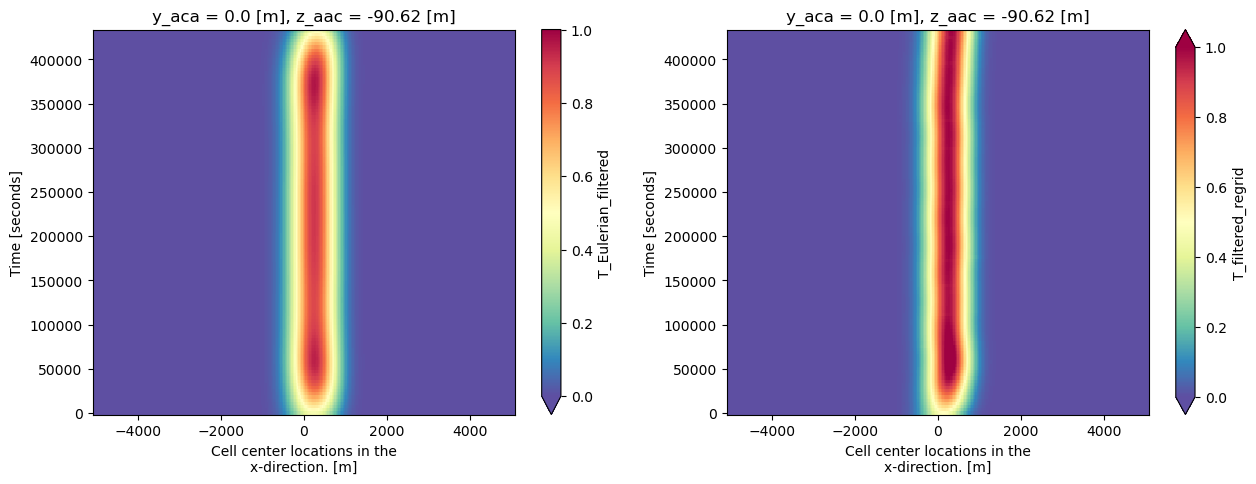

In [66]:
fig, ax = plt.subplots(1,2,figsize = (15,5))
ds.T_Eulerian_filtered[:,10,0,:].plot(ax=ax[0],cmap='Spectral_r',vmin=0,vmax=1)

# ds.T_Eulerian_filtered[:,10,0,:].plot.contour(ax=ax[0],levels=50, colors='k',linewidths=1)
# ds.T_filtered_regrid[:,10,0,:].plot.contour(ax=ax[1],levels=50, colors='k',linewidths=1)
ds.T_filtered_regrid[:,10,0,:].plot(ax=ax[1],cmap='Spectral_r',vmin=0,vmax=1)

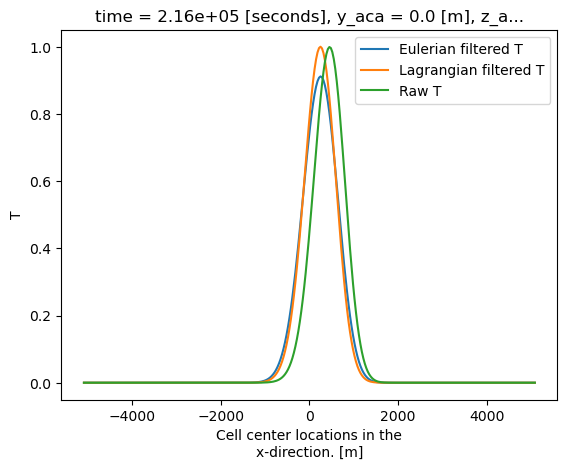

In [69]:
ds.T_Eulerian_filtered[60,10,0,:].plot(label='Eulerian filtered T')
ds.T_filtered_regrid[60,10,0,:].plot(label='Lagrangian filtered T')
ds.T[60,10,0,:].plot(label='Raw T')
plt.legend()

In [49]:
get_weight_function(ds.time,ds.time[60],N=2,freq_c=(1e-4)/2).sum()*(ds.time[1] - ds.time[0])

<xarray.DataArray 'time' ()>
array(0.50312145)

In [70]:
ds.to_netcdf("combined_output_filtered_Eulerian_Lagrangian.nc")

In [73]:
ds

<xarray.Dataset>
Dimensions:               (time: 121, y_afa: 1, x_faa: 306, x_caa: 306,
                           y_aca: 1, z_aac: 86, z_aaf: 87)
Coordinates:
  * time                  (time) float64 0.0 3.6e+03 ... 4.284e+05 4.32e+05
  * y_afa                 (y_afa) float32 0.0
  * x_faa                 (x_faa) float32 -5.1e+03 -5.067e+03 ... 5.067e+03
  * x_caa                 (x_caa) float32 -5.083e+03 -5.05e+03 ... 5.083e+03
  * y_aca                 (y_aca) float32 0.0
  * z_aac                 (z_aac) float32 -103.1 -101.9 -100.6 ... 1.875 3.125
  * z_aaf                 (z_aaf) float32 -103.8 -102.5 -101.2 ... 1.25 2.5 3.75
Data variables: (12/30)
    dx_caa                float32 ...
    dx_faa                float32 ...
    dy_aca                float32 ...
    dy_afa                float32 ...
    dz_aac                float32 ...
    dz_aaf                float32 ...
    ...                    ...
    T_filtered_regrid     (time, z_aac, y_aca, x_caa) float64 ...
    b_filtered_regrid     (time, z_aac, y_aca, x_caa) float64 ...
    wc_filtered_regrid    (time, z_aac, y_aca, x_caa) float64 ...
    b_Eulerian_filtered   (time, z_aac, y_aca, x_caa) float64 0.0 0.0 ... 0.0
    T_Eulerian_filtered   (time, z_aac, y_aca, x_caa) float64 0.0 0.0 ... 0.0
    wc_Eulerian_filtered  (time, z_aac, y_aca, x_caa) float64 0.0 0.0 ... 0.0
Attributes:
    Julia:    This file was generated using Julia Version 1.10.9

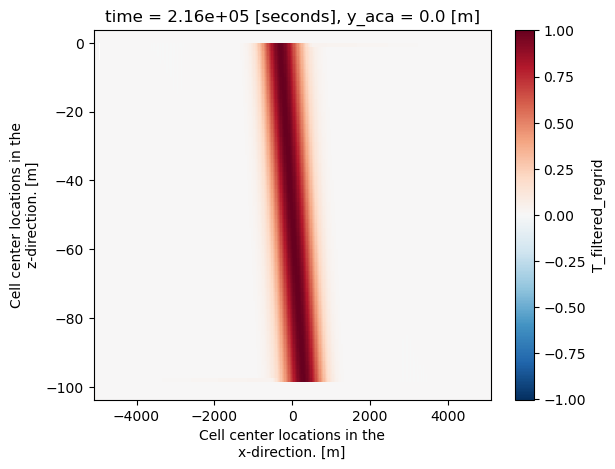

In [74]:
ds.T_filtered_regrid[60,:,0,:].plot()

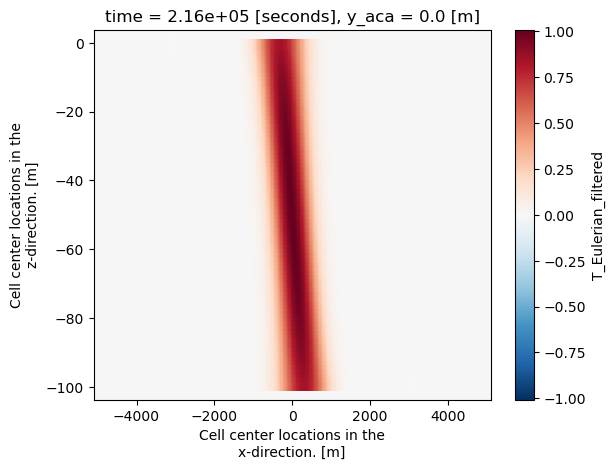

In [75]:
ds.T_Eulerian_filtered[60,:,0,:].plot()